shape of im =  720 ,  540
im_data[200,111] =  20
im_data[111,200] =  33
im_data.min() =  0
im_data.max() =  196


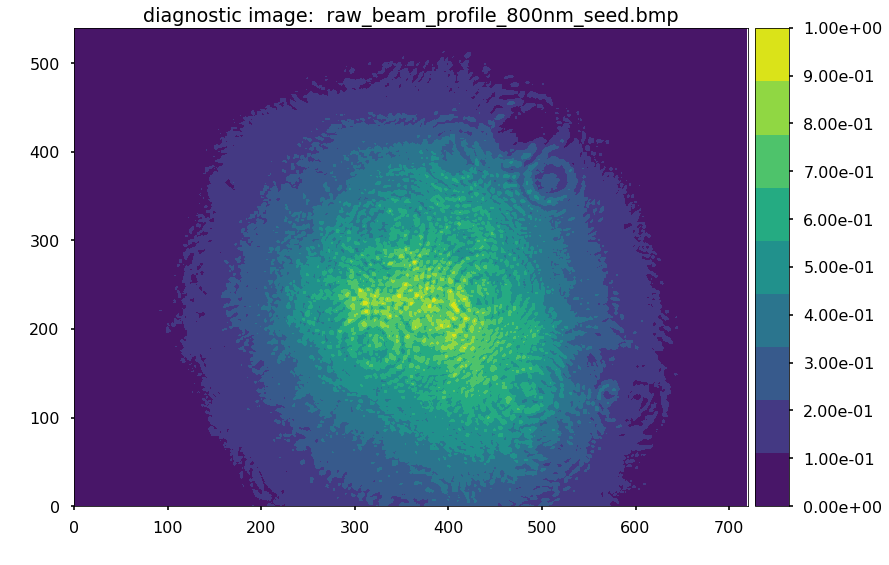

In [2]:
import imageio
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

image_name = 'raw_beam_profile_800nm_seed.bmp'
im_data = imageio.imread('../../../rslaser/package_data/' + image_name)

num_x = im_data.shape[1]
num_y = im_data.shape[0]
print('shape of im = ', num_x, ', ', num_y)

print('im_data[200,111] = ', im_data[200,111])
print('im_data[111,200] = ', im_data[111,200])
im_min = im_data.min()
print('im_data.min() = ', im_min)
im_max = im_data.max()
print('im_data.max() = ', im_max)

im_data = im_data / im_max        
im_max = im_data.max()
# print('im_data.max() = ', im_max)

x_pixels = np.zeros(num_x, dtype=int)
for i in range(num_x):
    x_pixels[i] = i
# print('x_pixels = ', x_pixels)

y_pixels = np.zeros(num_y, dtype=int)
for i in range(num_y):
    y_pixels[i] = i
# print('y_pixels = ', y_pixels)

with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()

    ax.axis([0, num_x, 0, num_y])
    ax.set_xlabel(' ')
    ax.set_ylabel(' ')
    ax.set_title('diagnostic image:  ' + image_name)

    del_level = im_max/10
    n_cbar_labels = 10  # choose an even number
    max_level = im_max
    c_levels = np.linspace(0, max_level, n_cbar_labels)

    contours = ax.contourf(x_pixels, y_pixels, im_data, c_levels, extent='none')

    # generate the colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(contours, format='%3.2e', cax=cax)
    tick_values = []
    for i in range(n_cbar_labels+1):
        tick_values.append(i * del_level)
    cbar.set_ticks(tick_values)
